Erreur quadratique moyenne (MSE): 2.61
Score R²: 0.97


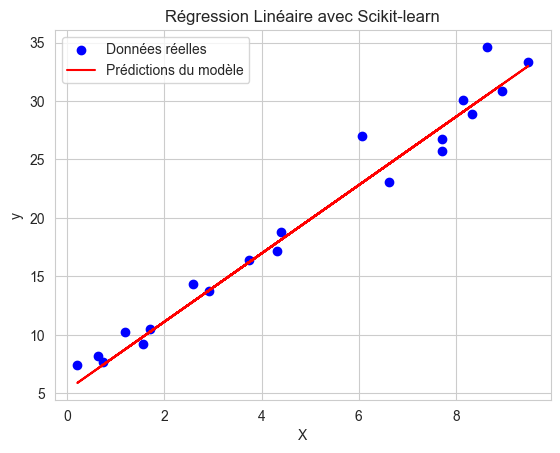

In [14]:
# # Régression : une introduction

# # Exemples de base:

# # Régression linéaire:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Génération de données synthétiques
np.random.seed(42)  # Pour reproductibilité
X = np.random.rand(100, 1) * 10  # Caractéristiques
y = 3 * X.flatten() + 5 + np.random.randn(100) * 2  # Cible avec un peu de bruit

# 2. Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Prédictions
y_pred = model.predict(X_test)

# 5. Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erreur quadratique moyenne (MSE): {mse:.2f}")
print(f"Score R²: {r2:.2f}")

# 6. Visualisation des résultats
plt.scatter(X_test, y_test, color='blue', label="Données réelles")
plt.plot(X_test, y_pred, color='red', label="Prédictions du modèle")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Régression Linéaire avec Scikit-learn")
plt.legend()
plt.show()


Précision (Accuracy) : 0.97

Matrice de confusion :
[[22  1]
 [ 0 17]]

Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.94      1.00      0.97        17

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



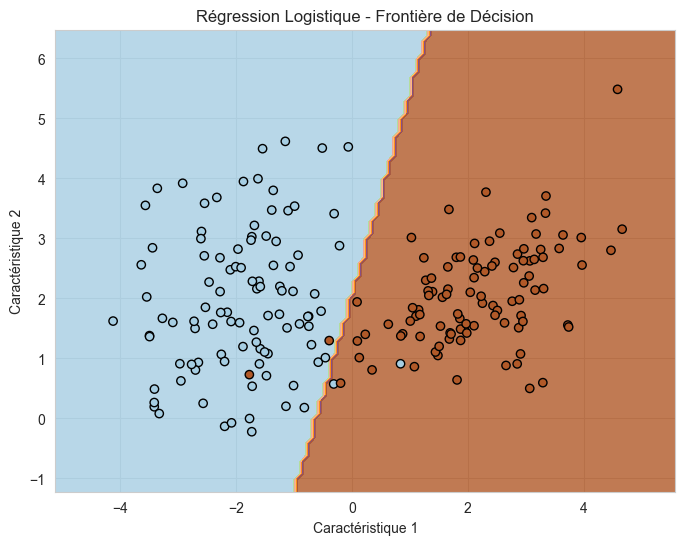

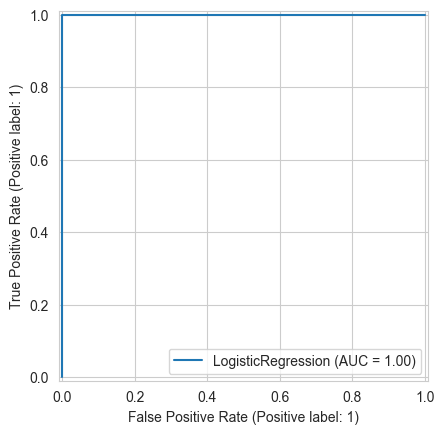

In [15]:
# # Régression logistique:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay

# 1. Génération de données synthétiques
X, y = make_classification(
    n_samples=200,  # Nombre d'exemples
    n_features=2,   # Nombre de caractéristiques
    n_informative=2, # Caractéristiques pertinentes
    n_redundant=0,  # Aucune caractéristique redondante
    n_clusters_per_class=1,  # Un cluster par classe
    class_sep=2.0,  # Séparation entre les classes
    random_state=42
)

# 2. Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Création et entraînement du modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Prédictions
y_pred = model.predict(X_test)

# 5. Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Précision (Accuracy) : {accuracy:.2f}")
print("\nMatrice de confusion :")
print(conf_matrix)
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

# 6. Visualisation des données et de la frontière de décision
plt.figure(figsize=(8, 6))
# Meshgrid pour la visualisation
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Contour de la frontière de décision
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Points de données
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.title("Régression Logistique - Frontière de Décision")
plt.xlabel("Caractéristique 1")
plt.ylabel("Caractéristique 2")
plt.show()

# 7. Courbe ROC
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()


In [ ]:
# # Exercices du cours

import requests

url = "https://raw.githubusercontent.com/linogaliana/python-datascientist/main/content/modelisation/get_data.py"
r = requests.get(url, allow_redirects=True)
open("getdata.py", "wb").write(r.content)

import getdata

votes = getdata.create_votes_dataframes()
votes.head(2)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics
import matplotlib.pyplot as plt

# 1. Régression linéaire de per_gop sur différentes variables explicatives
xvars = [
    "Unemployment_rate_2019",
    "Median_Household_Income_2019",
    "Percent of adults with less than a high school diploma, 2015-19",
    "Percent of adults with a bachelor's degree or higher, 2015-19",
]

df2 = votes[["per_gop"] + xvars].copy()
df2["log_income"] = np.log(df2["Median_Household_Income_2019"])
df2 = df2.dropna().astype(np.float64)


X_train, X_test, y_train, y_test = train_test_split(
    df2.drop(["Median_Household_Income_2019", "per_gop"], axis=1),
    100 * df2[["per_gop"]].values.ravel(),
    test_size=0.2,
    random_state=0,
)

ols = LinearRegression().fit(X_train, y_train)
y_pred = ols.predict(X_test)
y_pred[:10]

array([47.75272473, 60.69335226, 54.65325338, 67.83011949, 71.98578081,
       57.80274647, 66.57648309, 62.73808527, 50.46503891, 68.81856693])

In [3]:
# 2. Afficher les valeurs des coefficients
print(ols.intercept_, ols.coef_)

38.72457422624495 [-3.44264194 -0.47323213 -1.40067009  7.06268493]


In [4]:
# 3. Evaluer la pertinence du modèle

rmse = sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False)
rsq = sklearn.metrics.r2_score(y_test, y_pred)

print("Mean squared error: %.2f" % rmse)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % rsq)

Mean squared error: 12.56
Coefficient of determination: 0.41


C:\Users\dmarin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


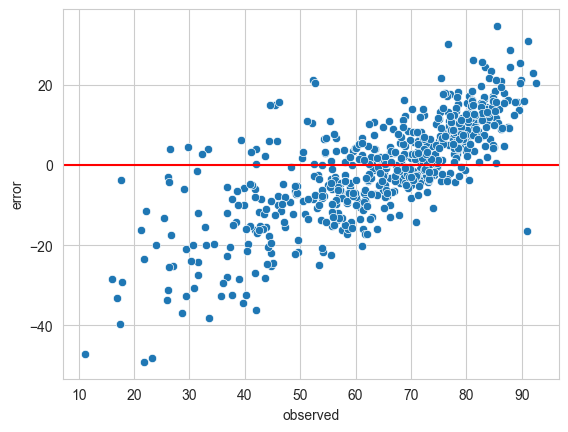

In [6]:
# 4. Nuage de points des valeurs observées
tempdf = pd.DataFrame(
    {"prediction": y_pred, "observed": y_test, "error": y_test - y_pred}
)

fig = plt.figure()
g = sns.scatterplot(data=tempdf, x="observed", y="error")
g.axhline(0, color="red")

# La répartition des erreurs n'est clairement pas
# aléatoire en fonction de $X$.
# Le modèle souffre
# donc d'un problème de spécification.
# g.figure.get_figure()

In [8]:
# # Exercice 1b: régression linéaire avec statsmodels

import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1. Régression linéaire de per_gop sur différentes variables explicatives
xvars = [
    "Unemployment_rate_2019",
    "Median_Household_Income_2019",
    "Percent of adults with less than a high school diploma, 2015-19",
    "Percent of adults with a bachelor's degree or higher, 2015-19",
]

xvars = [
    "Unemployment_rate_2019",
    "Median_Household_Income_2019",
    "Percent of adults with less than a high school diploma, 2015-19",
    "Percent of adults with a bachelor's degree or higher, 2015-19",
]

df2 = votes[["per_gop"] + xvars].copy()
df2["log_income"] = np.log(df2["Median_Household_Income_2019"])
df2 = df2.dropna().astype(np.float64)

X = sm.add_constant(df2.drop(["Median_Household_Income_2019", "per_gop"], axis=1))
results = sm.OLS(df2[["per_gop"]], X).fit()

# 2. Afficher le tableau de régression
print(results.summary())
# html_snippet = results.summary().as_html()

# 3. Calcul du R^2
print("R2: ", results.rsquared)

# 4. Nouvelle régression avec l'API formula
results = smf.ols(
    "per_gop ~ Unemployment_rate_2019 + I(Unemployment_rate_2019**2) + np.log(Median_Household_Income_2019)",
    data=df2,
).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                per_gop   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     608.7
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:02:11   Log-Likelihood:                 2172.5
No. Observations:                3107   AIC:                            -4335.
Df Residuals:                    3102   BIC:                            -4305.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [9]:
# # Exercice 1.2: régression logistique

from sklearn.linear_model import LogisticRegression
import sklearn.metrics

# 1. Modèle logit avec les mêmes variables que précédemment
xvars = [
    "Unemployment_rate_2019",
    "Median_Household_Income_2019",
    "Percent of adults with less than a high school diploma, 2015-19",
    "Percent of adults with a bachelor's degree or higher, 2015-19",
]

df2 = votes[["per_gop"] + xvars].copy()
df2["log_income"] = np.log(df2["Median_Household_Income_2019"])
df2 = df2.dropna().astype(np.float64)


df2["y"] = (df2["per_gop"] > 0.5).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    df2.drop(["Median_Household_Income_2019", "y"], axis=1),
    1 * df2[["y"]].values.ravel(),
    test_size=0.2,
    random_state=0,
)

clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(clf.intercept_, clf.coef_)

[-14.62057934] [[15.00472388 -0.09214409 -0.06893713 -0.09998192  1.04103832]]


0.9678456591639871
0.9803921568627451
0.9727626459143969
0.9881422924901185


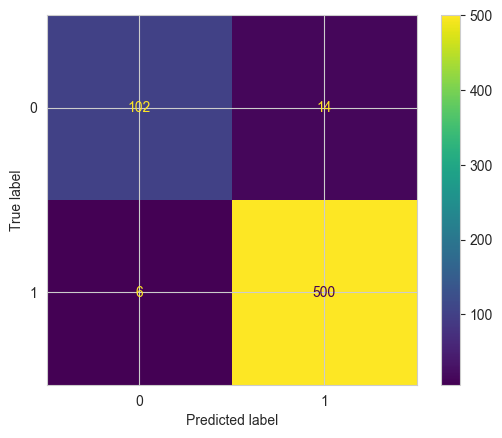

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay

# 2. Matrice de confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

sc_accuracy = sklearn.metrics.accuracy_score(y_pred, y_test)
sc_f1 = sklearn.metrics.f1_score(y_pred, y_test)
sc_recall = sklearn.metrics.recall_score(y_pred, y_test)
sc_precision = sklearn.metrics.precision_score(y_pred, y_test)

print(sc_accuracy)
print(sc_f1)
print(sc_recall)
print(sc_precision)

In [11]:
# 3. Supprimer la régularisation
clf2 = LogisticRegression(penalty=None).fit(X_train, y_train)
y_pred2 = clf.predict(X_test)
print(clf2.intercept_, clf2.coef_)
# Les coefficients sont complètement différents

[-2458.70076327] [[4.65372119e+03 2.34360618e+00 5.44252471e-01 1.05281104e-02
  1.02178028e+01]]


In [12]:
# # Exercice 2b : Régression logistique avec statmodels

from scipy import stats

# 1. Modèle logit avec les mêmes variables que précédemment
xvars = [
    "Unemployment_rate_2019",
    "Median_Household_Income_2019",
    "Percent of adults with less than a high school diploma, 2015-19",
    "Percent of adults with a bachelor's degree or higher, 2015-19",
]

df2 = votes[["per_gop"] + xvars]
df2["log_income"] = np.log(df2["Median_Household_Income_2019"])
df2 = df2.dropna().astype(np.float64)

df2["y"] = (df2["per_gop"] > 0.5).astype(int)

mylogit = smf.logit(
    formula="y ~ Unemployment_rate_2019 + I(Unemployment_rate_2019**2) + np.log(Median_Household_Income_2019)",
    data=df2[df2["Median_Household_Income_2019"] > 0],
).fit()
print(mylogit.summary())

Optimization terminated successfully.
         Current function value: 0.452194
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3107
Model:                          Logit   Df Residuals:                     3103
Method:                           MLE   Df Model:                            3
Date:                Mon, 25 Nov 2024   Pseudo R-squ.:                 0.04442
Time:                        19:05:10   Log-Likelihood:                -1405.0
converged:                       True   LL-Null:                       -1470.3
Covariance Type:            nonrobust   LLR p-value:                 3.977e-28
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               28.5676      2.5

C:\Users\dmarin\AppData\Local\Temp\ipykernel_11972\551898980.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["log_income"] = np.log(df2["Median_Household_Income_2019"])


In [13]:
# 2. Faire un test de ratio de vraisemblance
logit_h0 = smf.logit(
    formula="y ~ Unemployment_rate_2019 + I(Unemployment_rate_2019**2)",
    data=df2[df2["Median_Household_Income_2019"] > 0],
).fit()
# print(logit_h0.summary())

lr = -2 * (mylogit.llf - logit_h0.llf)
lrdf = logit_h0.df_resid - mylogit.df_resid

lr_pvalue = stats.chi2.sf(lr, df=lrdf)
# print(lr_pvalue)

# La pvalue du test de maximum de ratio
# de vraisemblance étant proche de  1,
# cela signifie que la variable log revenu ajoute,
# presque à coup sûr, de l'information au modèle.

Optimization terminated successfully.
         Current function value: 0.470844
         Iterations 5
